In [1]:
#数据以及包的导入
import pandas as pd
import numpy as np 
import os


In [2]:
road = "F:\BaiduNetdiskDownload\案例一【Elo用户忠诚度预测】\Part 1\数据\原始数据"

In [3]:
dictionary = pd.read_excel("F:\BaiduNetdiskDownload\案例一【Elo用户忠诚度预测】\Part 1\数据\原始数据\Data_Dictionary.xlsx")

In [5]:
dictionary.head(5)

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature


In [6]:
df2 = pd.read_csv("F:\BaiduNetdiskDownload\案例一【Elo用户忠诚度预测】\Part 1\数据\原始数据\sample_submission.csv")
df2.head(5)

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   card_id  123623 non-null  object
 1   target   123623 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


# train与test数据探索

In [8]:
import gc

In [9]:
train = pd.read_csv(r"F:\BaiduNetdiskDownload\案例一【Elo用户忠诚度预测】\Part 1\数据\原始数据\train.csv")
test = pd.read_csv("F:\BaiduNetdiskDownload\案例一【Elo用户忠诚度预测】\Part 1\数据\原始数据\\test.csv")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [12]:
(train.shape,test.shape)

((201917, 6), (123623, 5))

In [13]:
dictionary.head(10)

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


nunique()分别统计每一列有多少不同的值,返回的值类型是array
shape[]是numpy中函数，shape[0]输出矩阵的行数shape[1]输出矩阵的列数。

In [14]:
train["card_id"].nunique() == train.shape[0]

True

In [15]:
test["card_id"].nunique() == test.shape[0]

True

In [16]:
test["card_id"].head(19)

0     C_ID_0ab67a22ab
1     C_ID_130fd0cbdd
2     C_ID_b709037bc5
3     C_ID_d27d835a9f
4     C_ID_2b5e3df5c2
5     C_ID_5814b4f13c
6     C_ID_a1b3c75277
7     C_ID_f7cada36d3
8     C_ID_9d2bc8dfc4
9     C_ID_6d8dba8475
10    C_ID_4859ac9ed5
11    C_ID_0e281e8ad6
12    C_ID_8375dfdaa2
13    C_ID_79d149c008
14    C_ID_7f1041e8e1
15    C_ID_f72513589e
16    C_ID_a7f2d6984e
17    C_ID_15489b42d3
18    C_ID_e457bbd71d
Name: card_id, dtype: object

In [22]:
print(test.nunique())

first_active_month        75
card_id               123623
feature_1                  5
feature_2                  3
feature_3                  2
dtype: int64


In [26]:
test.shape[0]+train.shape[0]

325540

In [27]:
test["card_id"].nunique()+train["card_id"].nunique()==test.shape[0]+train.shape[0]

True

In [28]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [29]:
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [38]:
statistics=train["target"].describe()
statistics

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

set()创建一个无序不重复的数据集，可进行关系测试，删除重复数据，还可计算交、并、差集的运算。
seaborn.set()函数参数：seaborn.set(context=‘notebook’, style=‘darkgrid’, palette=‘deep’, font=‘sans-serif’, font_scale=1, color_codes=True, rc=None)

从这个set()函数，可以看出，通过它我们可以设置背景色、风格、字型、字体等。我们定义一个函数，这个函数主要是生成100个0到15的变量，然后用这个变量画出6条曲线。


<AxesSubplot:xlabel='target', ylabel='Count'>

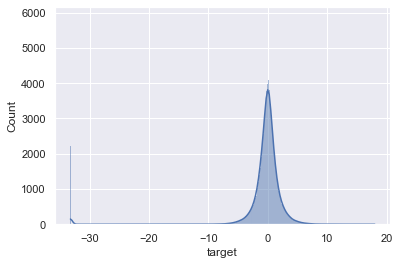

In [32]:
sns.set()
sns.histplot(train['target'],kde=True)

In [34]:
(train['target']<-30).sum()

2207

In [39]:
#import statistics
#利用Σ来进行异常值识别
statistics.loc['mean']-3*statistics.loc['std']

-11.945136285536126

# 规律一致性分析
查看测试集与训练集数据的规律是否一致,
1)数据特征对比
2）通过画图来分析

In [40]:
features = ["first_active_month","feature_1","feature_2","feature_3"]
#train_count = train.shape[0]
train_count = train["card_id"].nunique()
#test_count = test.shape[0]
test_count = test["card_id"].nunique()

## 计数
count()可以在字符串和列表里使用，用来统计元素的个数
value_count()用在panda中用于数据表的计数以及排序，指定列中有多少个不同的值，并可以根据需要进行排序。
value_counts(values,sort=True, ascending=False, normalize=False,bins=None,dropna=True)
sort=True： 是否要进行排序；默认进行排序
ascending=False： 默认降序排列；
normalize=False： 是否要对计算结果进行标准化并显示标准化后的结果，默认是False。
bins=None： 可以自定义分组区间，默认是否；
dropna=True：是否删除缺失值nan，默认删除
## 排序
sort(),sort_index(),sort_value()
### 1、sort_index()

通俗点讲，就是根据index的值进行排序，如果是按行排序，可以认为是根据index的值排序，如果是按列排序，可以认为是根据columns的值进行排序。默认升序，参数：ascending=False降序
### 2、sort_values（）

对dataframe按某一列的值进行排序，或者按某一行的值进行排序

In [43]:
p = train['first_active_month'].value_counts().sort_index()/train_count

<AxesSubplot:>

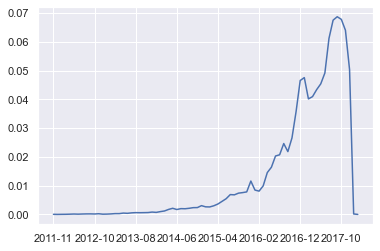

In [44]:
p.plot()

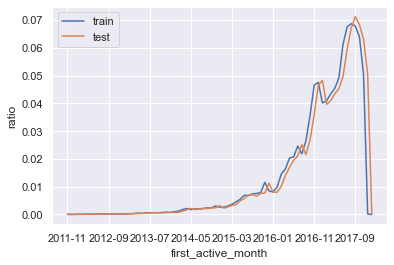

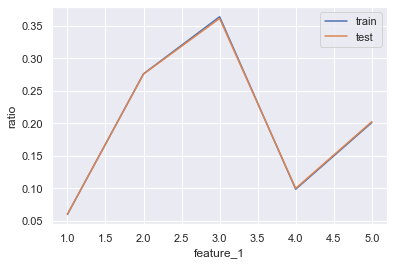

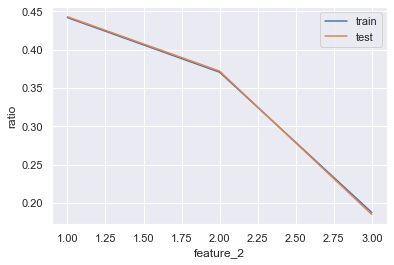

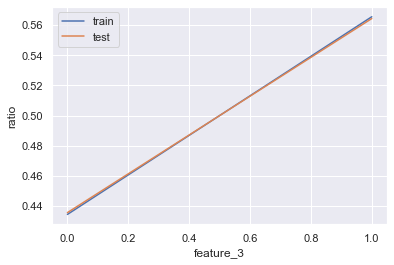

In [46]:
for feature in features:
    (train[feature].value_counts().sort_index()/train_count).plot()
    (test[feature].value_counts().sort_index()/test_count).plot()
    plt.legend(['train','test'])
    plt.xlabel(feature)
    plt.ylabel('ratio')
    plt.show()

In [57]:
#多变量联合分布
def combine_feature(df3):
    cols = df3.columns
    feature1 = df3[cols[0]].astype(str).values.tolist()
    feature2 = df3[cols[1]].astype(str).values.tolist()
    return pd.Series([feature1[i]+"&"+feature2[i] for i in range(df3.shape[0])])

In [58]:
cols = [features[0],features[1]]
cols

['first_active_month', 'feature_1']

In [59]:
train_com = combine_feature(test[cols])
train_com

0         2017-04&3
1         2017-01&2
2         2017-08&5
3         2017-12&2
4         2015-12&5
            ...    
123618    2017-10&2
123619    2017-09&3
123620    2016-09&5
123621    2017-06&2
123622    2016-10&5
Length: 123623, dtype: object

In [60]:
train_dis = train_com.value_counts().sort_index()/train_count
train_dis

2011-11&3    0.000015
2011-12&3    0.000010
2012-01&3    0.000005
2012-02&3    0.000020
2012-03&3    0.000050
               ...   
2018-01&2    0.000054
2018-01&3    0.000010
2018-01&4    0.000025
2018-01&5    0.000015
nan&5        0.000005
Length: 239, dtype: float64

In [61]:
test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
test_dis

2011-11&3    0.000024
2011-12&3    0.000016
2012-01&3    0.000008
2012-02&3    0.000032
2012-03&3    0.000081
               ...   
2018-01&2    0.000089
2018-01&3    0.000016
2018-01&4    0.000040
2018-01&5    0.000024
nan&5        0.000008
Length: 239, dtype: float64

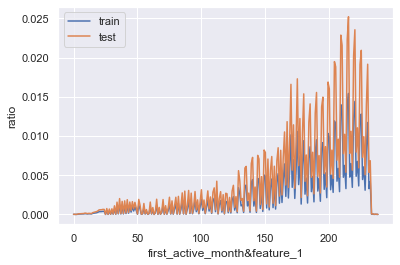

In [64]:
index_dis = pd.Series(train_dis.index.tolist()+test_dis.index.tolist()).drop_duplicates()
(index_dis.map(train_dis).fillna(0)).plot()
(index_dis.map(test_dis).fillna(0)).plot()

plt.legend(['train','test'])
plt.xlabel('&'.join(cols))
plt.ylabel("ratio")
plt.show()

['first_active_month', 'feature_1']


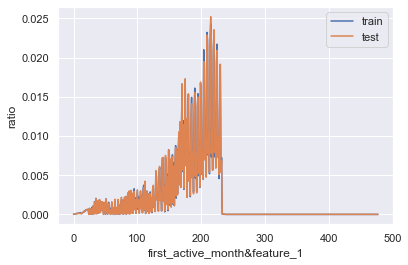

['first_active_month', 'feature_2']


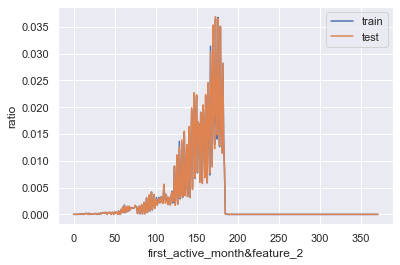

['first_active_month', 'feature_3']


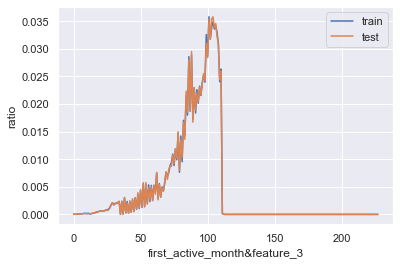

['feature_1', 'feature_2']


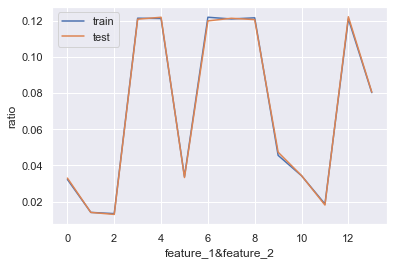

['feature_1', 'feature_3']


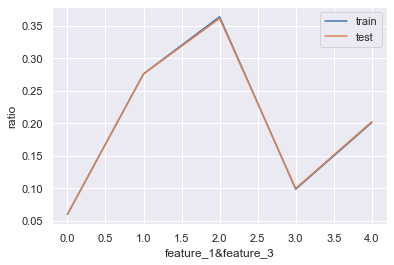

['feature_2', 'feature_3']


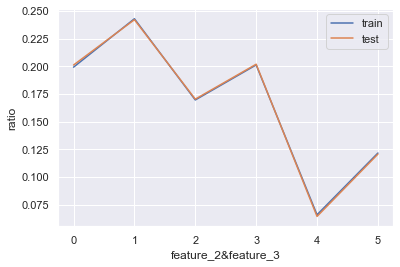

In [71]:
n = len(features)
for i in range(n-1):
    for j in range(i+1,n):
        cols = [features[i],features[j]]
        print(cols)
        train_dis = combine_feature(train[cols]).value_counts().sort_index()/train_count
        test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
        index_dis = pd.Series(train_dis.index.tolist()+test_dis.index.tolist()).drop_duplicates()
        (index_dis.map(train_dis).fillna(0)).plot()
        (index_dis.map(test_dis).fillna(0)).plot()

        plt.legend(['train','test'])
        plt.xlabel('&'.join(cols))
        plt.ylabel("ratio")
        plt.show()

# 交易数据